# Predicting churn probability of Bank Customers

## Phase 2 :

### Group 29

|Name | Student ID
|-----|-----|
|Aishwarya Thomas| S3962715
|Deepa Rose Thomas| S3952532

# Table of Contents
* [Introduction](#Introduction)
    + [Phase 1 Summary](#Summary)
    + [Report Overview](#Overview)
    + [Methodology](#Methodology)
* [Predictive Modelling](#Modelling)
    + [Data loading & Preparation](#Loading)
    + [Feature Selection](#Feature)
    + [Model Fitting & Tuning](#Fitting)
    + [Neural Network Fitting & Tuning](#Neural)
    + [Model Comparison](#Comparison)
* [Critique & Limitations](#Critique)
* [Summary & Conclusions](#SummaryA)
    + [Project Summary](#Project)
    + [Summary of Findings](#Findings)
    + [Conclusions](#Conclusion)

## INTRODUCTION <a id='Introduction'></a>

<div style="text-align: justify">Predicting bank customer churn is a valuable task that can help banks identify customers who are likely to close their accounts and take proactive measures to retain them. 
Here we have a dataset which contains the details of the bank customers. The basic attributes to identify a customer, is provided in the form of a unique customer ID and a surname field. <br><br>Certain additional features provided in the dataset are the Creditscore which indicates a consumer's creditworthiness, Geography, Gender, Age, Tenure, Balance, Number of bank products used by the customer and the Number of credit cards issued by the bank to the customer. These features seem to adequate enough to predict the churn for banking customers as a classification problem. <br>
The dataset has a total of 13 features excludng the row numbers of the records and 10000 observations. 

* ### Phase 1 Summary  <a id='Summary'></a>


<div style="text-align: justify">In Phase 1 we choose our data set which contains the details fo bank customers from Github. We explored the various attributes of the dataset and identified the target feature. The targt feature is a categorical variable which indicates whether the customer is likely to churn. We have identfied it as a classification problem.<br><br>
We further discussed the objectives of the problem and why is it necessary for banks to be able to predict the likelyhood of customer churn. 

In the next step, we undertook the data cleaning and preprocessing. We checked number of rows attributes and removed the attributes that were found be irrelevent or redundant. Summary statistics of the attributes were then analysed which gave us an overall idea of the data set.

In the data cleaning phase we checked for missing values and outliers and found the data set to be clean. We did a random sampling of 5000 rows as our dataset had 10000 observations.
Exploration and Visualisation was then carried out to understand the ditribution of various attributes and their relationship with the target feature. We were able to identify some intyeresting patterns related to customer churn based on the creditscore, bank balance, customer tenure etc.

Finally we concluded that even though we were able to understand certain significant feautures that is related to customer rate, we need to further analysis to explore these relationships and patterns further.</div>

* ### Overview <a id = 'Overview'></a>


<div style="text-align: justify">The Phase 2 report provides a comprehensive analysis of the project's predictive modelling methodology, model fitting, comparison, critique and the overall project summary. We have organized the report in the following manner: </div>

<style>
    ul {
        text-align: justify;
    
    }
</style>
<ul>
    
<li><strong><em>Introduction </em></strong>Outlines the bankground information</li>
<li><strong><em>Summary</em></strong> Provides a recap of Phase 1 and findings</li>
<li><strong><em>Methodology Overview</em></strong> Explains the predictive modelling methodology that we have used</li>
    <li><strong><em>Feature Selection</em></strong> Describes the methods used for Feature selection</li>
<li><strong><em>Model Fitting and Tuning</em></strong> Describes the ML algorithms that we have used in this Phase, the fine tuning process for each algorithm, its performance analysis with relevent metrics for evaluation</li>
<li><strong><em>Neural Network Model Fitting and Tuning</em></strong> Outlines the overview of NN model topology and parameters</li>
<li><strong><em>Model Comparison</em></strong> Compares the performance of different algortihms used</li>
<li><strong><em>Critique</em></strong> Identifies the strenght and limitations of the approach and potential areas of improvement</li>
<li><strong><em>Summary and Conclusion</em></strong> summaries our work and outlines the conslusions drawn from the project</li></ul>

* ### Methodology Overview<a id = 'Methodology'></a>

We consider the following binary classifiers for the target variable precdiction
* K- Nearest Neighbours (KNN)
* Decision Tree (DT)
* Naive Bayes (NB)
* Random Forest Classifier

We have sampled 5000 rows from the dataset and split the dataset into training and test sets in a 70:30 ratio. This way our training set 3500 rows and our test set has 1500 rows. We have outlines our terminologies as to :
* The 3500 riws of data used during the hyper-parameter tuning phase is called the ***training*** data
* The 1500 rows used during the performance comparison phase is called the ***test*** data.

<div style="text-align: justify">We have performed the Encoding of categorical features and have done feature selection to identify the best features. Each of the classifier is then made to undergo hyper tuning of parameters using cross validation.
Classifiers with the best set of hyper-parameter values as identified via grid search using the training data are called tuned classifiers. Once we identify the three tuned classifiers (with the best hyper-parameter values), we "fit" them on the test data.
In addition, we compare the classifiers with respect to their recall scores and confusion matrices on the test data.</div>


## PREDICTIVE MODELLING  <a id = 'Modelling'></a>


* ### Data Loading & Preparation

* We are loading the same dataset that we have used for the phase 1 from the Github repository
* We print 10 randomly sampled rows from this dataset

In [33]:
#importing the required packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
pd.set_option('display.max_columns', None) 
###
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###


In [34]:
#name of the dataset imported from Github
df_name = 'data.csv'

In [35]:
df_url = 'https://raw.githubusercontent.com/Pradnya1208/Bank-customers-churn-prediction/main/' + df_name
url_content = requests.get(df_url, verify=False).content
churncustomer_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [36]:
#displaying 10 random rows from the dataset
churncustomer_df.sample(10, random_state = 999)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9031,9032,15742323,Barese,541,France,Male,39,7,0.00,2,1,0,19823.02,0
3462,3463,15713596,Ugochukwu,428,France,Female,62,1,107735.93,1,0,1,58381.77,0
3863,3864,15645095,Huang,674,France,Female,28,3,0.00,1,1,0,51536.99,0
1144,1145,15694821,Hardy,765,Germany,Male,43,4,148962.76,1,0,1,173878.87,1
2692,2693,15736274,Prokhorova,751,France,Male,31,8,0.00,2,0,0,17550.49,0
9541,9542,15669290,Fan,603,France,Male,38,8,59360.77,1,1,1,191457.06,0
2227,2228,15744368,Sun,633,Spain,Male,58,6,98308.51,1,1,1,132034.13,0
210,211,15752047,Trevisano,689,Germany,Male,33,2,161814.64,2,1,0,169381.90,0
5709,5710,15606158,Genovese,644,France,Female,39,9,0.00,1,1,0,3740.93,0
9334,9335,15777217,Somadina,641,Spain,Male,25,10,0.00,2,1,1,180808.39,0


In [37]:
churncustomer_df.shape

(10000, 14)

In [38]:
#Dropping irrelevent columns for our prediction
drop_columns = ['RowNumber','CustomerId','Surname']
churncustomer_df.drop(drop_columns, axis = 1, inplace = True)

In [39]:
churncustomer_df.shape

(10000, 11)

In [41]:
#Removing white spaces before and after column names
churncustomer_df.columns = churncustomer_df.columns.str.strip()
columns_mapping = {
    'CreditScore' : 'credit_score',
    'Geography': 'country',
     'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'number_of_products',
    'HasCrCard':'has_creditcard',
    'IsActiveMember': 'is_active',
    'EstimatedSalary':'salary_estimate',
    'Exited':'churn'
}
# Renaming columns
churncustomer_df = churncustomer_df.rename(columns = columns_mapping)
churncustomer_df.sample(5, random_state=999)

,credit_score,country,gender,age,tenure,balance,number_of_products,has_creditcard,is_active,salary_estimate,churn
9031,541,France,Male,39,7,0.00,2,1,0,19823.02,0
3462,428,France,Female,62,1,107735.93,1,0,1,58381.77,0
3863,674,France,Female,28,3,0.00,1,1,0,51536.99,0
1144,765,Germany,Male,43,4,148962.76,1,0,1,173878.87,1
2692,751,France,Male,31,8,0.00,2,0,0,17550.49,0


#### Checking for missing values

This is done as to make sure we do not have any missing values

In [42]:
churncustomer_df.isna().sum()

credit_score          0
country               0
gender                0
age                   0
tenure                0
balance               0
number_of_products    0
has_creditcard        0
is_active             0
salary_estimate       0
churn                 0
dtype: int64

#### Check for outliers

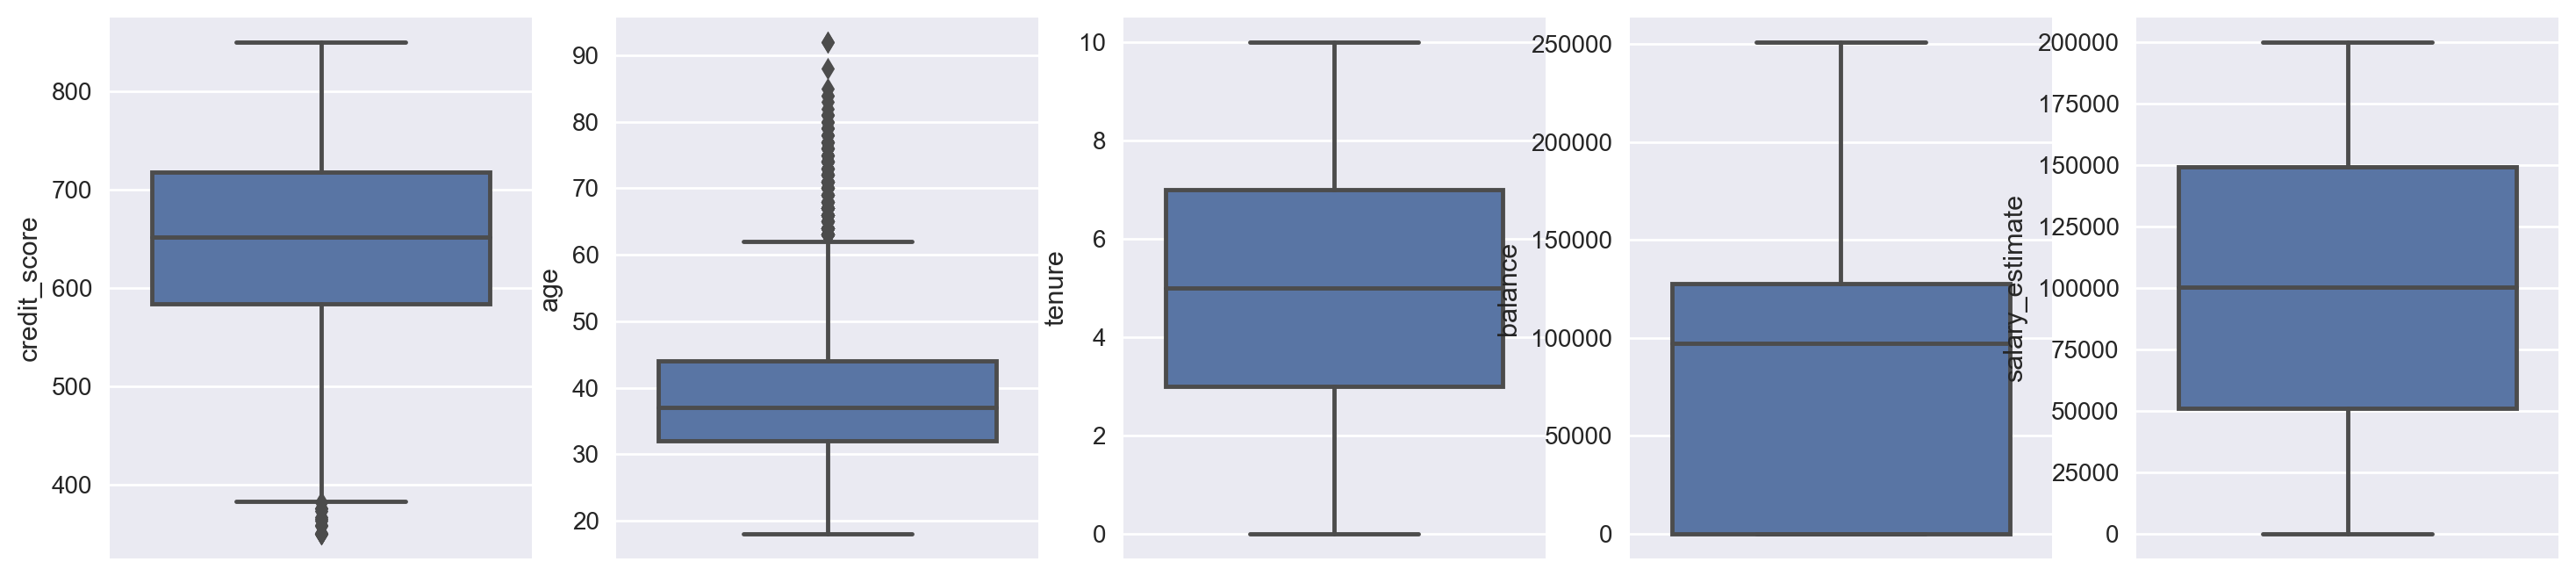

In [43]:
columns = ['credit_score','age','tenure','balance','salary_estimate']
plt.figure(figsize = (18,4))
i = 1
for column in columns:
    plt.subplot(1,5,i)
    sns.boxplot(y=column, data = churncustomer_df)
    i +=1

***Inference*** : No missing values, no outliers to be handled

In [44]:
#Displaying 5 random rows from our clean data
churncustomer_df.sample(5, random_state = 999)

,credit_score,country,gender,age,tenure,balance,number_of_products,has_creditcard,is_active,salary_estimate,churn
9031,541,France,Male,39,7,0.00,2,1,0,19823.02,0
3462,428,France,Female,62,1,107735.93,1,0,1,58381.77,0
3863,674,France,Female,28,3,0.00,1,1,0,51536.99,0
1144,765,Germany,Male,43,4,148962.76,1,0,1,173878.87,1
2692,751,France,Male,31,8,0.00,2,0,0,17550.49,0


* ### Feature Selection <a id = 'Feature'></a>

<h1 style ="font-size :15px">ENCODING CATEGORICAL FEATURES</h1>

Prior to modelling its important that we encode all categorical features in to a set of numerical values

#### Encoding Target Feature

Here our target feature is **churn** which is already in the form on 0s and 1s with 1 represnting a Churned Customer and 0 representing a Non-Churn Customer. Hence we choose not to encode the target feature

#### Encoding Categorical Descriptive Features

<div style = "text-align:justify"> Here all of the descriptive features appear to be nominal, we perform one-hot-encoding. Furthermore, since we plan on conducting feature selection, we define q dummy variables for a categorical descriptive variable with  q
levels. The exception here is that when a categorical descriptive feature has only two levels, we define a single dummy variable. Let's extract the list of categorical descriptive features.</div>

In [45]:
categorical_cols = churncustomer_df.columns[churncustomer_df.dtypes==object].tolist()

Lets examine our categorical features

In [46]:
categorical_cols

['country', 'gender']

Here as explained before, for every 2-level catagorical variables, we set the `drop_first` option to `True` so as to encode the variable to a single column with 0 or 1 values. Later, we apply the `get_dummies()` function to perform one-hot encoding for categorical features having more than 2 levels

In [47]:
for col in categorical_cols:
    if (churncustomer_df[col].nunique() == 2):
        churncustomer_df[col] = pd.get_dummies(churncustomer_df[col], drop_first=True)
        
#use one-hot-encoding for categorical features with >2 levels
churncustomer_df = pd.get_dummies(churncustomer_df)

Let's examine the feature set

In [48]:
churncustomer_df.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance',
       'number_of_products', 'has_creditcard', 'is_active', 'salary_estimate',
       'churn', 'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [49]:
churncustomer_df.sample(n=5, random_state = 999)

,credit_score,gender,age,tenure,balance,number_of_products,has_creditcard,is_active,salary_estimate,churn,country_France,country_Germany,country_Spain
9031,541,1,39,7,0.00,2,1,0,19823.02,0,1,0,0
3462,428,0,62,1,107735.93,1,0,1,58381.77,0,1,0,0
3863,674,0,28,3,0.00,1,1,0,51536.99,0,1,0,0
1144,765,1,43,4,148962.76,1,0,1,173878.87,1,0,1,0
2692,751,1,31,8,0.00,2,0,0,17550.49,0,1,0,0


<h1 style ="font-size :15px">SCALING OF FEATURES</h1>

Now we use min-max scaling or normalization as to transfrom the values of descrittive features within a specific range. We choose to make a copy of the dataset to keep track of column names

In [50]:
from sklearn import preprocessing
Data_df = churncustomer_df.copy()
Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(churncustomer_df)
churncustomer_df = Data_scaler.fit_transform(churncustomer_df)

<div style = "text-align : justify">Lets examine the columns again after scaling. The output of the scaler will be a transformed version of the original data with the values being resclaed to a range between 0 and 1. The resultant data is represented as a Numpy array with all column names now lost. This is the reason why we have kept a copy of data before scaling so that we can recover the column names later. The binary feature are still kept the same after min-max scaling</div>

<h1 style ="font-size :15px">RANDOM SAMPLING FROM THE SCALED DATASET</h1>

In [52]:
Data_df = pd.DataFrame(churncustomer_df, columns=Data_df.columns).sample(5000, random_state=999)
Data_df.head()

,credit_score,gender,age,tenure,balance,number_of_products,has_creditcard,is_active,salary_estimate,churn,country_France,country_Germany,country_Spain
9031,0.382,1.0,0.283784,0.7,0.000000,0.333333,1.0,0.0,0.099067,0.0,1.0,0.0,0.0
3462,0.156,0.0,0.594595,0.1,0.429401,0.000000,0.0,1.0,0.291879,0.0,1.0,0.0,0.0
3863,0.648,0.0,0.135135,0.3,0.000000,0.000000,1.0,0.0,0.257652,0.0,1.0,0.0,0.0
1144,0.830,1.0,0.337838,0.4,0.593718,0.000000,0.0,1.0,0.869419,1.0,0.0,1.0,0.0
2692,0.802,1.0,0.175676,0.8,0.000000,0.333333,0.0,0.0,0.087703,0.0,1.0,0.0,0.0


In [53]:
Data_df.shape

(5000, 13)

<h1 style ="font-size :15px">FEATURE SELECTION USING F_CLASSIF</h1>


Since we are working on a binary classification problem we have used the `f_classif` scoring function for selecting the best features from our dataset. We have set the number of top features to be 10 in this case

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate the features (X) and the target variable (y)
X = Data_df.drop('churn', axis=1)
y = Data_df['churn']

# Performing feature selection using SelectKBest with f_classif
k = 10  # We have set the top features to be 10
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:")
for feature_name in selected_feature_names:
    print(feature_name)


Selected features:
credit_score
gender
age
balance
number_of_products
is_active
salary_estimate
country_France
country_Germany
country_Spain


We have identified the above 10 features as the top ones for our further analysis. Now lets visualise these features to identify their order of importance

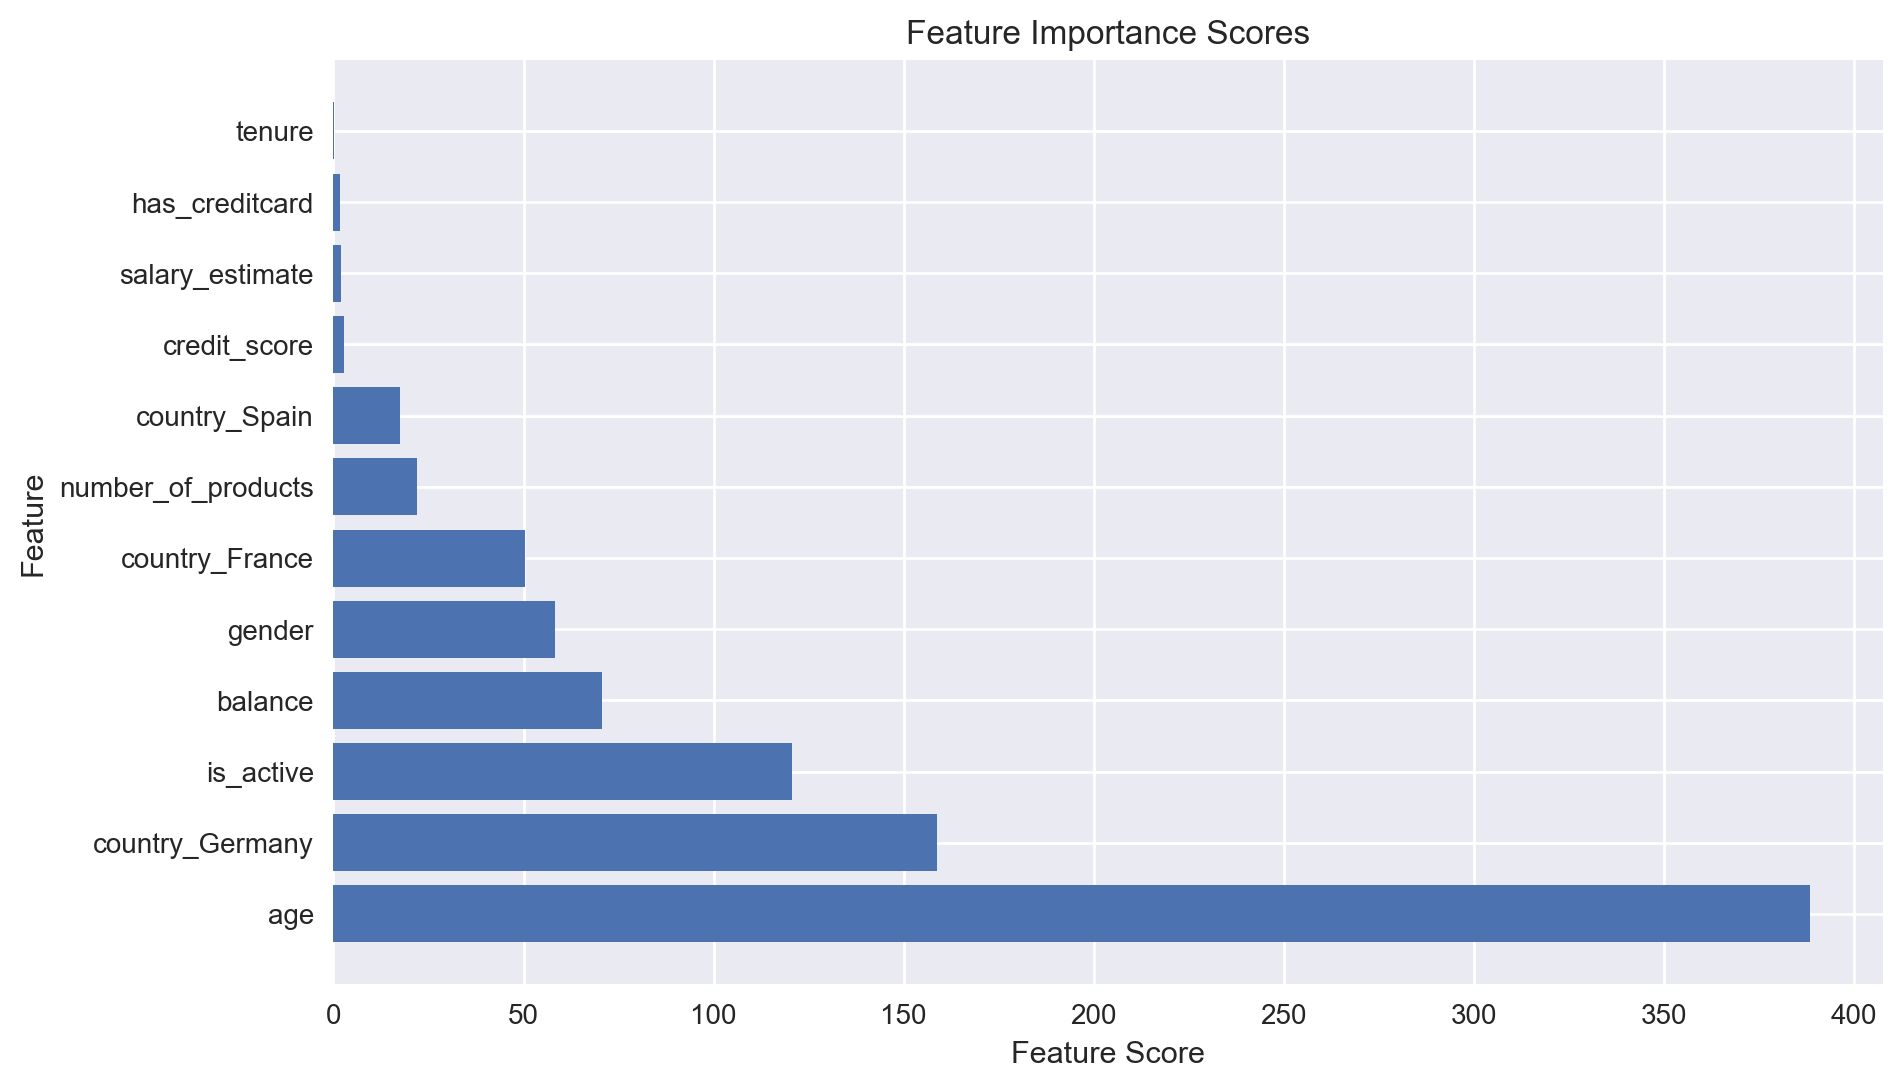

In [55]:

# Get the feature scores from SelectKBest
feature_scores = selector.scores_

# Create a DataFrame with feature names and scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sort the DataFrame by scores in descending order
feature_scores_df = feature_scores_df.sort_values('Score', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Score'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()


***Inference*** : We observe that the most important feature is age followed by country_Germany, is_active, balance and gender

<h1 style ="font-size :15px">SPLITTING OF DATA INTO TRAIN-TEST SPLITS</h1>

In [56]:
from sklearn.model_selection import train_test_split

# Create a DataFrame with the selected features only
selected_features_df = Data_df[selected_feature_names]

# Separate the features (X) and the target variable (y) from the selected features DataFrame
X = selected_features_df
y = Data_df['churn']

# Split the selected features DataFrame into train and test sets
test_size = 0.3
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the shape of the train and test sets
print("Train set shape: ", X_train.shape)
print("Test set shape:  ", X_test.shape)

Train set shape:  (3500, 10)
Test set shape:   (1500, 10)


***Inference*** : We have split the dataset in the ratio 70:30 and have 3500 rows in our train set and 1500 rows in our test set

<h1 style ="font-size :15px">STRATEGY FOR MODEL EVALUATION</h1>

We will train and tune our models of `3500` rows of training data and we will test them on `1500` rows of test data.
<br>We do hyperparameter tuning for each model, using `5-fold stratified cross-validation` evaluation method (without any repetitions for shorter run times).

* ### Model Fitting and Tuning <a id = 'Fitting'></a>

<h1 style ="font-size :16px">K-NEAREST NEIGHBORS (KNN)</h1>

Using `Pipeline` we stack the feature selection and grid search for KNN hyperparameter tuning via cross-validation

The hyperparameters for KNN are:
* number of neighbors `(n_neighbors)` and
* the distance metric `p`
* weights `uniform or distance`

In [57]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = roc_auc_score(y_test, knn_predictions)

# Print the accuracy
print("AUC:", accuracy)


AUC: 0.6594232110171707


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline
pipe_KNN = Pipeline(steps=[('knn', KNeighborsClassifier())])

# Define the hyperparameter space
params_KNN = {'knn__n_neighbors': [3,5,7,9],
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2]}

# Apply GridSearchCV for hyperparameter tuning
grid_KNN = GridSearchCV(estimator=pipe_KNN,
                        param_grid=params_KNN,
                        cv=5,
                        scoring='roc_auc',
                        verbose=1)

# Fit the model
grid_KNN.fit(X_train, y_train)


# Get the best hyperparameters and model
best_params = grid_KNN.best_params_
best_model = grid_KNN.best_estimator_
knn_predictions = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("AUC:", accuracy)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
AUC: 0.826


***Inference:***
The AUC score is found to have improved upon Hyperparameter tuning

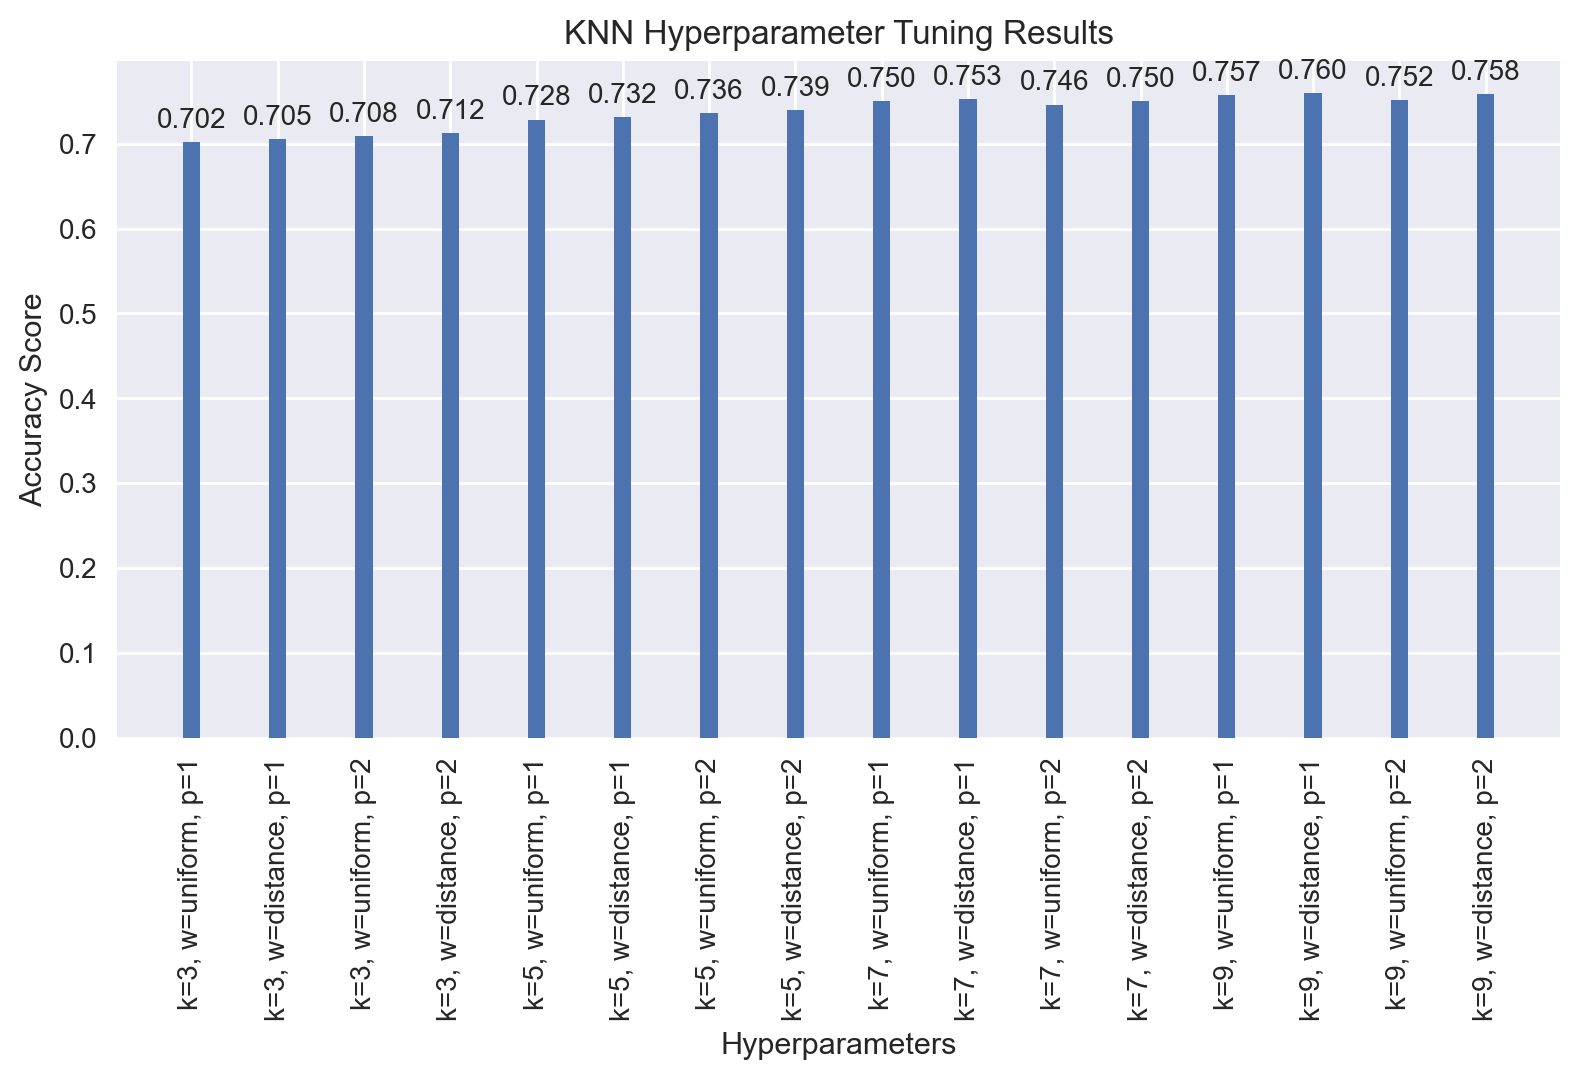

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the results from the GridSearchCV object
results = grid_KNN.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extract the hyperparameter values
n_neighbors = [param['knn__n_neighbors'] for param in params]
weights = [param['knn__weights'] for param in params]
p_values = [param['knn__p'] for param in params]

# Create a bar plot
x = np.arange(len(mean_scores))
width = 0.2

fig, ax = plt.subplots()
rects = ax.bar(x, mean_scores, width)

# Set labels and title
ax.set_xlabel('Hyperparameters')
ax.set_ylabel('Accuracy Score')
ax.set_title('KNN Hyperparameter Tuning Results')

# Set x-axis tick labels
hyperparameters = [f'k={n}, w={w}, p={p}' for n, w, p in zip(n_neighbors, weights, p_values)]
ax.set_xticks(x)
ax.set_xticklabels(hyperparameters, rotation=90)

# Add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


***Inference :*** 
<br><br>
In the above plot, each bar represents a specific combination of hyperparameters (n_neighbours, weight and p_value). The height of each bar represents the accuracy score achieved with that particular set of parameters. From this plot we can infer that, `n_neighbours = 9`, `p= 1 which is the Manhattan distance and weights = distance` gives us the maximum accuarcy score for this model.

<h1 style ="font-size :16px">DECISION TREE (DT)</h1>

In [61]:
#Model Fitting using Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)
print("Decision Tree ROC AUC:", dt_roc_auc)

Decision Tree ROC AUC: 0.6868081582846686


In [70]:
#Hyper tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the pipeline
pipe_DT = Pipeline(steps=[('dt', DecisionTreeClassifier())])

# Define the hyperparameter space
params_DT = {'dt__max_depth': [3, 5, 7],
             'dt__min_samples_split': [2, 4, 6]}

# Apply GridSearchCV for hyperparameter tuning
grid_DT = GridSearchCV(estimator=pipe_DT,
                       param_grid=params_DT,
                       cv=5,
                       scoring='roc_auc',
                       verbose=1)

# Fit the model
grid_DT.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_DT.best_params_
best_model = grid_DT.best_estimator_
dt_predictions = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("AUC:", accuracy)




Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'dt__max_depth': 5, 'dt__min_samples_split': 6}
AUC: 0.852


***Inference***:
The Hypertuning has increased the AUC score

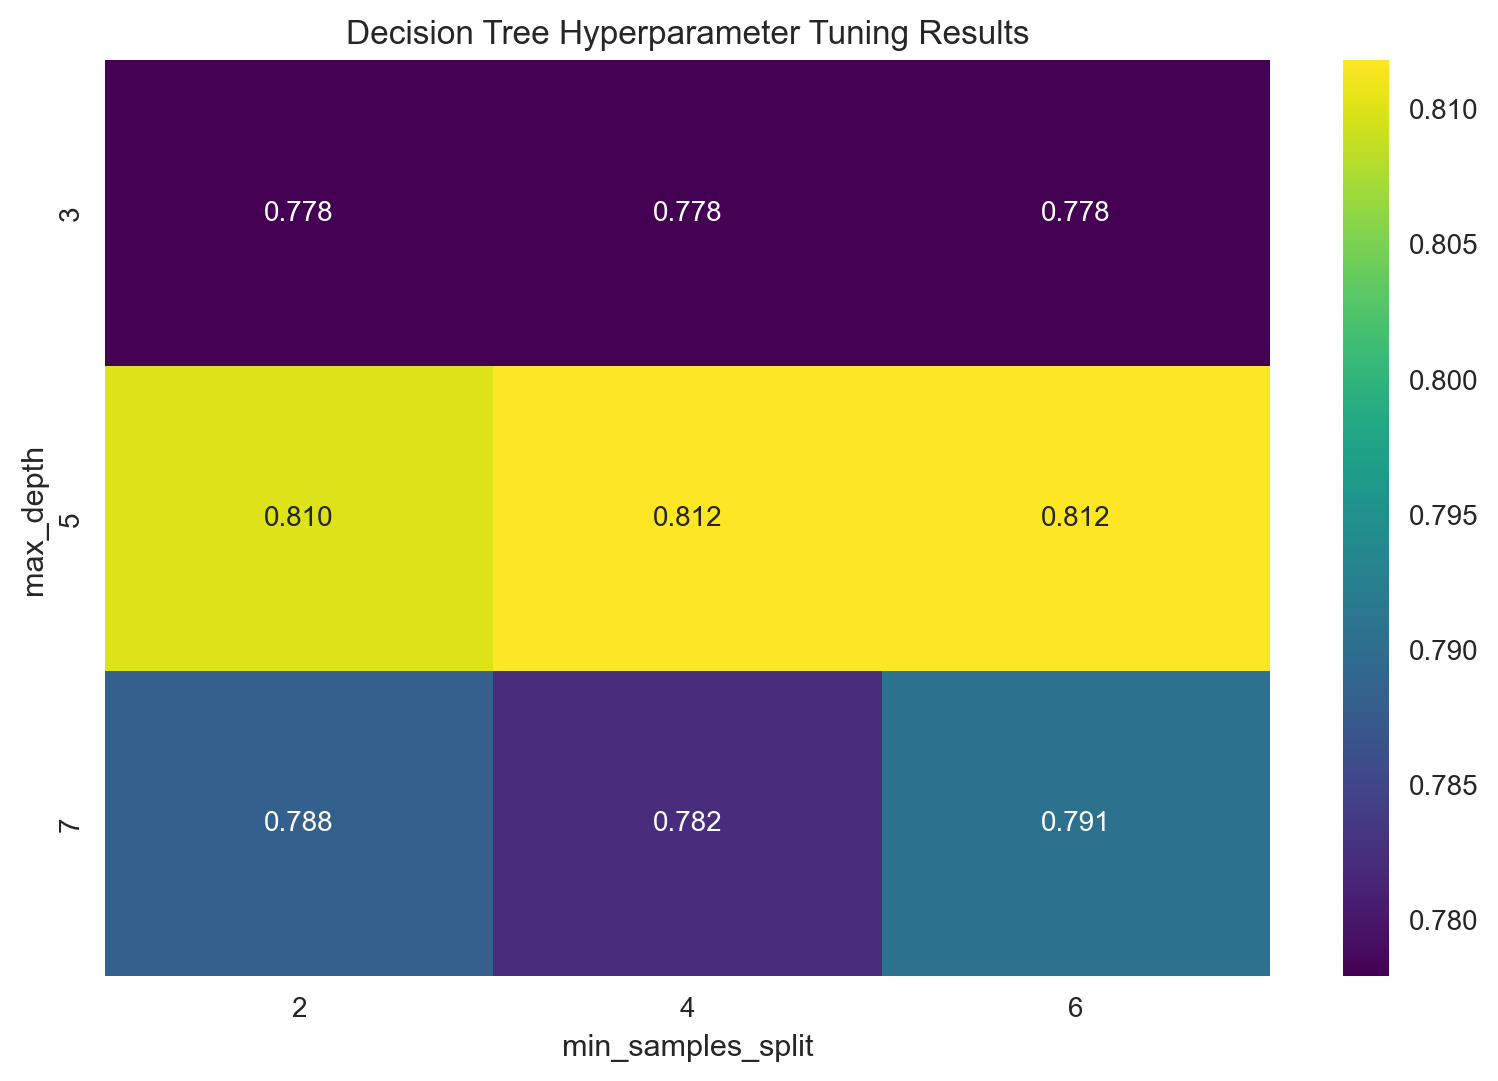

In [63]:
# Extract the results from the GridSearchCV object
results = grid_DT.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extract the hyperparameter values
max_depths = np.unique([param['dt__max_depth'] for param in params])
min_samples_splits = np.unique([param['dt__min_samples_split'] for param in params])

# Create a matrix of mean scores
score_matrix = np.array(mean_scores).reshape(len(max_depths), len(min_samples_splits))

# Create a heatmap plot
sns.heatmap(score_matrix, annot=True, fmt=".3f", cmap='viridis')

# Set labels and title
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Decision Tree Hyperparameter Tuning Results')

# Set x-axis and y-axis tick labels
plt.xticks(np.arange(len(min_samples_splits)) + 0.5, min_samples_splits)
plt.yticks(np.arange(len(max_depths)) + 0.5, max_depths)

# Show the plot
plt.tight_layout()
plt.show()

***Inference:*** <br><br>
In the heat map plot, color of each cell represents the corresponding mean test score for a specific combination of hyperparameters. The intensity of color indicates the magnitude of mean test score. 
After analysing the heat map, we can understand that `max_depth: 5 and min_samples_split:6` gives the maximum accuracy score for this model  </div>


<h1 style ="font-size :16px">(GAUSSIAN) NAIVE BAYES (DT)</h1>

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
nb_roc_auc = roc_auc_score(y_test, nb_predictions)
print("Naive Bayes ROC AUC:", nb_roc_auc)

Naive Bayes ROC AUC: 0.6364235596618147


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Define the pipeline
pipe_NB = Pipeline(steps=[('nb', GaussianNB())])

# Define the hyperparameter space
params_NB = {'nb__var_smoothing': np.logspace(1,-3, num=200)}

# Apply GridSearchCV for hyperparameter tuning
grid_NB = GridSearchCV(estimator=pipe_NB,
                       param_grid=params_NB,
                       cv=5,
                       scoring='roc_auc',
                       verbose=1)

# Fit the model
grid_NB.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_NB.best_params_
best_model = grid_NB.best_estimator_
nb_predictions = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Hyperparameters:", best_params)
print("AUC:", accuracy)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Hyperparameters: {'nb__var_smoothing': 0.001}
AUC: 0.8073333333333333


***Inference***:
The Hypertuning has increased the AUC score

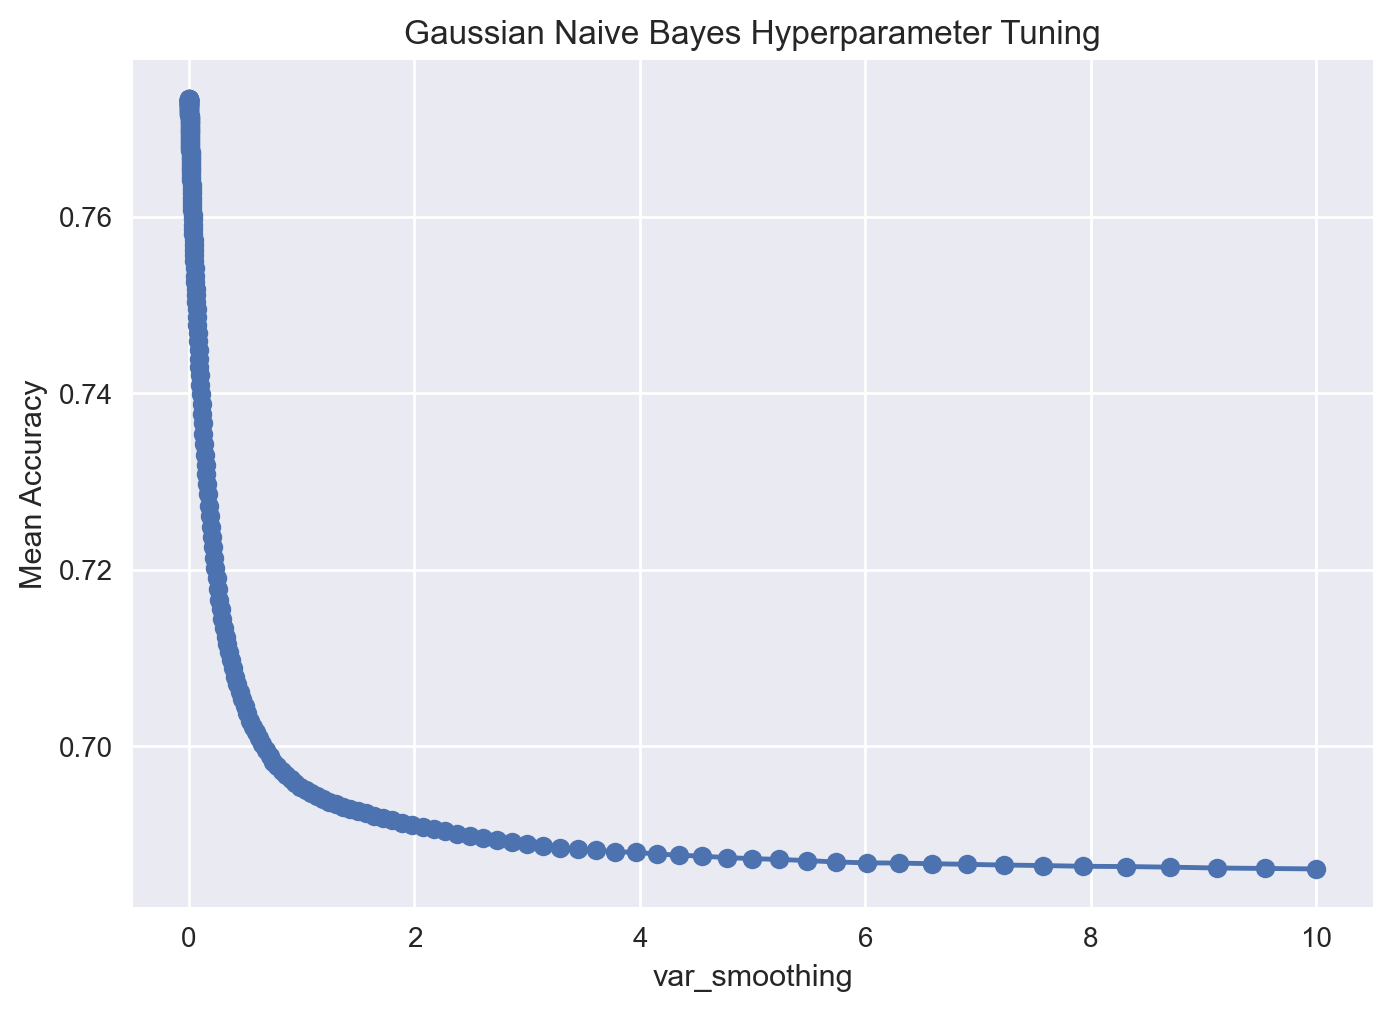

In [66]:
import matplotlib.pyplot as plt

# Extract the hyperparameters and mean scores from the grid search results
hyperparams = grid_NB.cv_results_['param_nb__var_smoothing']
mean_scores = grid_NB.cv_results_['mean_test_score']

# Plot the hyperparameter tuning results
plt.plot(hyperparams, mean_scores, marker='o')
plt.xlabel('var_smoothing')
plt.ylabel('Mean Accuracy')
plt.title('Gaussian Naive Bayes Hyperparameter Tuning')
plt.grid(True)
plt.show()


***Inference:***
<br>
We got the maximum accuracy score with `nb_var_smoothing as 0.001`

<h1 style ="font-size :16px">RANDOM FOREST CLASSIFIER</h1>

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
print("Random Forest ROC AUC:", rf_roc_auc)

Random Forest ROC AUC: 0.7131035910398327


In [72]:

from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter distribution
param_dist = {
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 11)
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, cv=5, scoring='roc_auc', n_iter=10)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
rf_predictions = best_model.predict(X_test)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("AUC:", accuracy)



Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
AUC: 0.86


***Inference***:
The Hypertuning has increased the AUC score

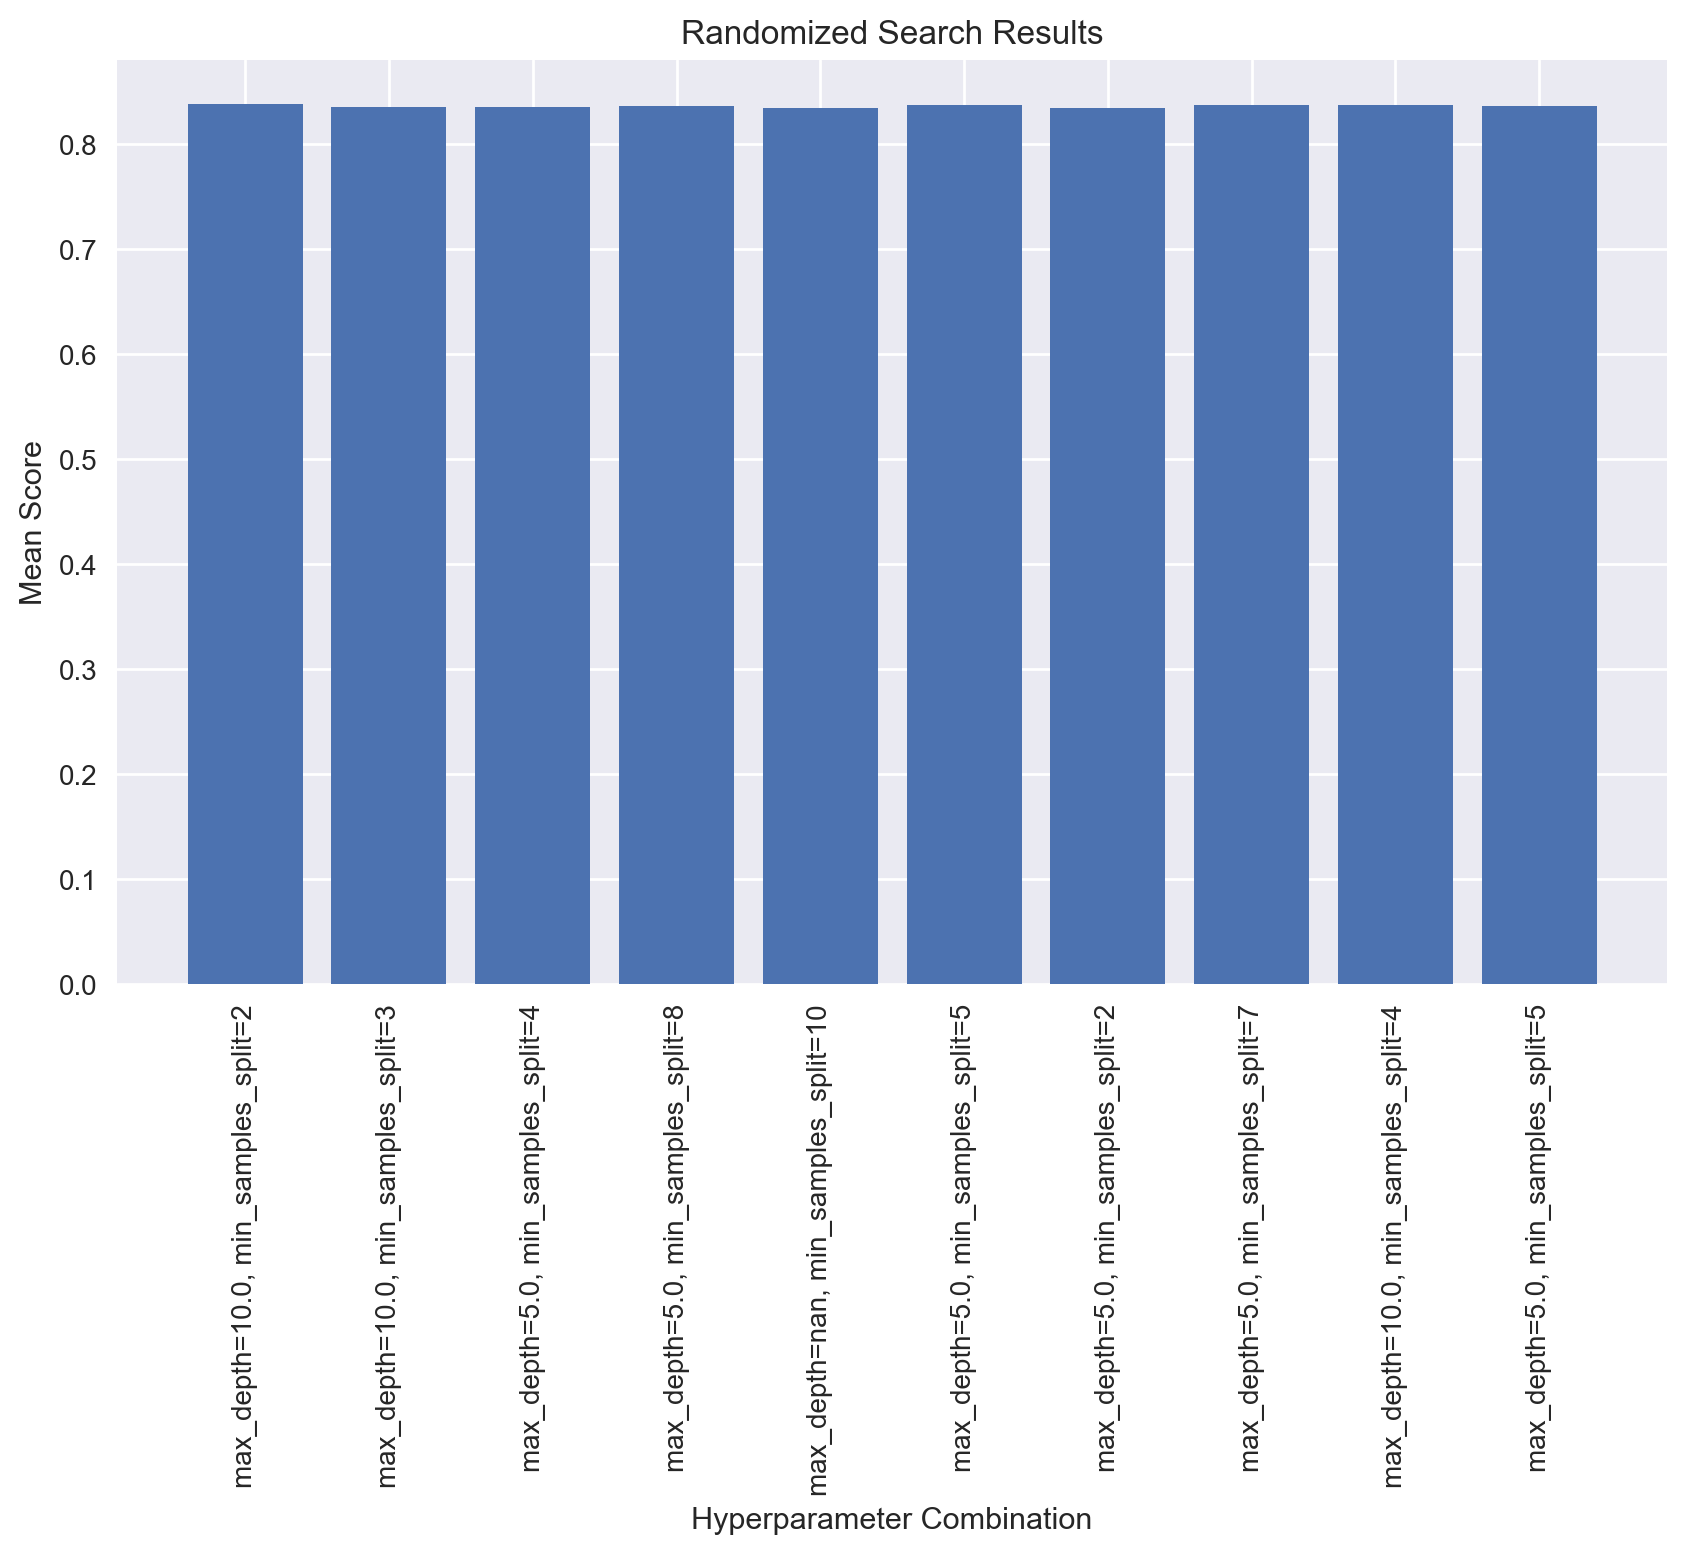

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the results of the randomized search
results = random_search.cv_results_

# Create a DataFrame with hyperparameter combinations and corresponding scores
df_scores = pd.DataFrame({
    'max_depth': [param['max_depth'] for param in results['params']],
    'min_samples_split': [param['min_samples_split'] for param in results['params']],
    'mean_score': results['mean_test_score'],
    'std_score': results['std_test_score']
})


# Plot the mean score for each hyperparameter combination
plt.figure(figsize=(10, 6))
plt.bar(range(len(df_scores)), df_scores['mean_score'])
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Score')
plt.xticks(range(len(df_scores)), [f"max_depth={depth}, min_samples_split={split}" for depth, split in zip(df_scores['max_depth'], df_scores['min_samples_split'])], rotation=90)
plt.title('Randomized Search Results')
plt.show()


***Inference :***
<br><br>
 Here the bar plot shows the mean score for each of the hyperparameter combination tested during the randomized search. The mean score is found to be highest for the combination `max_depth:10`  and `min-sample-split : 2`


* ### Neural Network Fitting and Tuning <a id = 'Neural'></a>

To predict churn in bank customers here we are going to build a NN model. The NN model consists of an `input layer, a hidden layer, and an output layer`

* <div style = "text-align:justify">The input layer consists of nodes where each node corresponds to different features in the dataset and the number of nodes is determined by the dimensionality of the input data. Here we have 13 features therefore the input layer has got 13 nodes.</div>

* <div style = "text-align:justify">Next is the hidden layer consisting of a variable number of nodes depending upon the complexity of the problem. Here we have two hidden layers, with 64 nodes in the first hidden layer and 32 nodes in the second hidden layer.</div>

* <div style = "text-align:justify">The output layer consists of only a single node which predicts whether the customer is churned or not. In this case, it is the target variable “Exited” where ‘0’ indicates not churned and ‘1’ indicated churned customers</div>

The model parameter values we used in this model are:

* <div style = "text-align:justify"> Activation Function: It is a function that is used to identify the non-linearities in the model. Here in our model, we used ReLU (Rectified Linear Unit) function in hidden layers to find the non-linearity and to find out the complex relationship in our data. Additionally, we also used the sigmoid function in the output layer. The sigmoid activation function is used for binary classification where we can predict whether the customer is churned or not by the values ‘0’(not churned) and ‘1’ (churned).</div>

* <div style = "text-align:justify"> Loss Function: It is a function that penalizes the model for incorrect prediction. Here we use Binary Cross-Entropy Loss as the loss function which is effective for binary classification.</div>

* <div style = "text-align:justify"> Optimizer: During the training process, the weights of the neural network are updated using the Adam (Adaptive Moment Estimation) optimizer. Adam adjusts the learning rate based on the gradient and momentum.</div>

* <div style = "text-align:justify"> Learning Rate: The learning rate determines the step size at which the optimizer adjusts the weights. A value of 0.001 is used, but it can be fine-tuned to achieve optimal performance.</div>

* <div style = "text-align:justify"> Batch Size: The number of training samples that are propagated through the network before the weights are updated is specified by the batch size. In this situation, a number of 32 is utilized, although it can be changed depending on the computational resources available.</div>

***Fine-tuning hyperparameters:***

* <div style = "text-align:justify"> Number of Hidden Layers: By changing the number of hidden layers from one, two, three, and so on we can reduce the complexity of the representation of the model. This also helps to maintain a balance between the complexity and computational efficiency of the model. Here layer gives good performance to predict the churn of the customers.</div>

* <div style = "text-align:justify"> Number of Nodes in Hidden Layers: The number of nodes in the hidden layers determines the capacity of the model so that we can find the complex patterns that are present in the model. We must use different numbers of nodes in the model and evaluate the accuracy. The configuration which gives the best accuracy is then chosen for the model. Using 64 nodes in the first hidden layer, 32 nodes in the second hidden layer, and 16 nodes in the third hidden layer produced good results, according to our numerous studies</div>

* <div style = "text-align:justify"> Learning Rate: From 0.0001 to 0.1 learning rates were used in our experiments. We trained the model for a fixed number of epochs at each learning rate, recording the training and validation accuracies. It was decided to use the learning rate with the best validation accuracy.</div>

* <div style = "text-align:justify"> Dropout Rate:  By varying the dropout rates we can determine the model’s performance. It is also used to lower the overfitting in the model so that we can keep all the information.</div>

* <div style = "text-align:justify"> Batch size: We investigate how various batch sizes affect training time and convergence. The plot demonstrates that while bigger batch sizes (such as 64) have faster convergence but may lose certain fine-grained information, smaller batch sizes (such as 16) result in more frequent weight changes but demand more training iterations.</div>



* ### Model Comparison <a id = 'Comparison'></a>

<div style ="text-align: justify">During the hyper-parameter tuning phase above, we used the 3500 rows in our training data within a cross-validation framework and determined the best hyper-parameter values for each of the classifiers we used. For KNN, the best hyper-parameter values was found to be k = 9 and p = 2 and weights = uniform. <br><br>
    
The next thing that we have to do is "fit" each tuned classifier (with the best set of hyper-parameter values) on the 1500 rows in the test data in a cross-validated fashion to determine which (tuned) classifier performs the best. This way, we can measure the performance of the tuned classifiers on unseen data.

Since cross validation itself is a random process, we would like to perform pairwise t-tests to determine if any difference between the performance of any two (tuned) classifiers is statistically significant [1]. Specifically, we first perform 10-fold stratified cross-validation (without any repetitions) on each (tuned) classifier where we use the same seed in each of the three cross-validation runs. Second, we conduct a paired t-test for the Accuracy score between the following (tuned) classifier combinations:</div>

* KNN vs. DT,
* DT vs. NB, 
* NB vs. RF and
* KNN vs. RF
    

<h1 style ="font-size :16px">Discussion</h1>

<div style = "text:align-justify">Machine learning is often considered both an art and a science. While there are standard methods for performance comparison, the "proper" approach depends upon objectives we have defined and the dataset characteristics.<br>

In certain cases, where the dataset is quite small, you might choose to use the entire dataset for both hyperparameter tuning and performance comparison. This can be done by using, for example, 5-repeated 3-fold cross-validation. Although this might appear incorrect since the same data is used in both phases, the limited data can make it challenging to have separate sets. However, using cross-validation in both phases helps to combat overfitting and can be an acceptable trade-off in such cases.

Another popular approach is the nested cross-validation method, which involves two levels of cross-validation. In this approach, an outer cross-validation framework, such as 3-repeated 5-fold cross-validation, is used for train-test splitting. Within this outer loop, an inner cross-validation scheme, such as 5-fold cross-validation without repetitions, is used for hyperparameter tuning. This approach is more involved but can provide a more robust performance comparison.

Ultimately, the choice of the performance comparison method should be driven by the specific requirements and limitations of your project. It's important to consider factors such as the size of the dataset, the availability of labeled data, and the trade-offs between computational resources and model evaluation.</div>

<h1 style ="font-size :16px">Comparison</h1>

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the cross-validation method
cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=111)

# Perform cross-validation
cv_results_KNN = cross_val_score(estimator=knn,
                                 X=X_test,
                                 y=y_test,
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='roc_auc')

# Calculate the mean cross-validation score
mean_score_KNN = cv_results_KNN.mean()

# Print the mean cross-validation score
print("Mean AUC for KNN:", mean_score_KNN)


Mean AUC for KNN: 0.7319832535164603


In [76]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

cv_results_DT = cross_val_score(estimator=dt_classifier,
                                X=X_test,
                                y=y_test,
                                cv=cv_method_ttest,
                                n_jobs=-2,
                                scoring='roc_auc')
# Calculate the mean cross-validation score
mean_score_DT = cv_results_DT.mean()

# Print the mean cross-validation score
print("Mean AUC for Decision Tree:", mean_score_DT)

Mean AUC for Decision Tree: 0.6607159799403634


In [77]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

cv_results_NB = cross_val_score(estimator=nb_classifier,
                                X=X_test,
                                y=y_test,
                                cv=cv_method_ttest,
                                n_jobs=-2,
                                scoring='roc_auc')\

mean_score_NB = cv_results_NB.mean()
# Print the mean cross-validation score
print("Mean AUC for Naive Bayes:", mean_score_NB)


Mean AUC for Naive Bayes: 0.7640612481551761


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

cv_results_RF = cross_val_score(estimator=rf_classifier,
                                X=X_test,
                                y=y_test,
                                cv=cv_method_ttest,
                                n_jobs=-2,
                                scoring='roc_auc')

mean_score_RF = cv_results_RF.mean()
print("Mean AUC for Random Forest:", mean_score_RF)


Mean AUC for Random Forest: 0.8427225497725972


<div style = "text:align-justify"> From the above results the tuned Random Forest classifier has a better performance than other models with a cross validated AUC score of 0.84. The AUC for Naive Bayes is 0.76 where as Decision Tree and KNN has AUC scores 0.66 and 0.73 respectively.<br>
    
We have fixed the random stateto be the same during cross-validation and since all the tuned classifiers were fitted and tested on exactly same partitions of data, we used 'paired ttest' to compare the models.</div>
<br>

We used the `stats.ttest_rel` function from the `SciPy` module to run the paired t-tests.

<h1 style ="font-size :16px">Paired T-tests</h1>

In [79]:
from scipy.stats import ttest_rel

# paired t-test between KNN and DT
t_statistic_KNN_DT, p_value_KNN_DT = ttest_rel(cv_results_KNN, cv_results_DT)

# paired t-test between DT and NB
t_statistic_DT_NB, p_value_DT_NB = ttest_rel(cv_results_DT, cv_results_NB)

# paired t-test between NB and RF
t_statistic_NB_RF, p_value_NB_RF = ttest_rel(cv_results_NB, cv_results_RF)

# paired t-test between KNN and RF
t_statistic_KNN_RF, p_value_KNN_RF = ttest_rel(cv_results_KNN, cv_results_RF)


# Print the results
print("Paired t-test between KNN and DT:")
print("t-statistic:", t_statistic_KNN_DT)
print("p-value:", p_value_KNN_DT)

print("\nPaired t-test between DT and NB:")
print("t-statistic:", t_statistic_DT_NB)
print("p-value:", p_value_DT_NB)

print("\nPaired t-test between NB and RF:")
print("t-statistic:", t_statistic_NB_RF)
print("p-value:", p_value_NB_RF)

print("\nPaired t-test between KNN and RF:")
print("t-statistic:", t_statistic_KNN_RF)
print("p-value:", p_value_KNN_RF)


Paired t-test between KNN and DT:
t-statistic: 3.873314477206107
p-value: 0.003769652357085394

Paired t-test between DT and NB:
t-statistic: -5.430157721941365
p-value: 0.0004162860947270631

Paired t-test between NB and RF:
t-statistic: -6.960951069491749
p-value: 6.603909591073356e-05

Paired t-test between KNN and RF:
t-statistic: -9.980506446125787
p-value: 3.636819303042104e-06


<div style = "text:align-justify">A p-value smaller than 0.05 indicates a statistically significant difference. <br>

For the t-statistic, a negative value indicates that the mean difference between the paired samples is negative, suggesting that the second algorithm (the one mentioned second in the test) performs better on average than the first algorithm (the one mentioned first in the test).

From these results, difference between KNN/DT, DT/NB, NB/RF and KNN/RF are all statistically significant. 

Based on these results, we can conclude that RF (Random Forest) consistently performs significantly better than the other models (KNN, DT, and NB).  
</div>

<h1 style ="font-size :16px">Classification Report</h1>

In [80]:
from sklearn.metrics import classification_report

# Classification report for KNN
knn_report = classification_report(y_test, knn_predictions)
print("KNN Classification Report:")
print(knn_report)

# Classification report for DT
dt_report = classification_report(y_test, dt_predictions)
print("\nDT Classification Report:")
print(dt_report)

# Classification report for NB
nb_report = classification_report(y_test, nb_predictions)
print("\nNB Classification Report:")
print(nb_report)

# Classification report for RF
rf_report = classification_report(y_test, rf_predictions)
print("\nRF Classification Report:")
print(rf_report)


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1192
         1.0       0.65      0.33      0.44       308

    accuracy                           0.83      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.81      0.83      0.80      1500


DT Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1192
         1.0       0.74      0.43      0.54       308

    accuracy                           0.85      1500
   macro avg       0.80      0.69      0.73      1500
weighted avg       0.84      0.85      0.84      1500


NB Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      1192
         1.0       0.55      0.34      0.42       308

    accuracy                           0.81      1500
   macro avg       0.70      0.63      0.65    

From the classification report we make the following observations:

***KNN***:
The KNN model achieves a relatively high precision (0.85) for class 0 and recall (0.96) indicating that it correctly identifies true negatives and true positives. The overall accuracy of the model is 0.83, indicating that it correctly predicts 83% of the instances overall.

***DT***:

The precision for class 0 is high (0.87), indicating a good performance in identifying true negatives.
The recall for class 1 also high moderate (0.96), indicating it captures a good portion of true positives as well
The F1-score for class 1 is moderate (0.54), suggesting a reasonable balance between precision and recall for class 1.
The accuracy is 0.85, indicating an overall correct prediction rate of 85%.

***NB:***

The precision for class 0 is high (0.87), indicating it correctly identifies true negatives.
The recall and F1-score for class 1 are also high, indicating good performance in capturing true positives.
The accuracy is 0.81, indicating an overall correct prediction rate of 81%.

***RF:***

The precision for class 0 is high (0.87), indicating a good performance in identifying true negatives.
The recall for class 1 is also high (0.97), indicating a good performance in identifying of true positives.
The F1-score for class 1 is high (0.92), suggesting a high balance between precision and recall for class 1.
The accuracy is 0.86, indicating an overall correct prediction rate of 86%.

Based on these observations, the DT and RF models generally perform better than KNN and NB. They have higher precision, recall, F1-score, and accuracy values.

<h1 style ="font-size :16px">Confusion Matrix</h1>

In [81]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor")
print(metrics.confusion_matrix(y_test, knn_predictions))
print("\nConfusion matrix for Decision Tree")
print(metrics.confusion_matrix(y_test, dt_predictions))
print("\nConfusion matrix for Naive Bayes")
print(metrics.confusion_matrix(y_test, nb_predictions))
print("\nConfusion matrix for Random Forest")
print(metrics.confusion_matrix(y_test, rf_predictions))


Confusion matrix for K-Nearest Neighbor
[[1138   54]
 [ 207  101]]

Confusion matrix for Decision Tree
[[1146   46]
 [ 176  132]]

Confusion matrix for Naive Bayes
[[1106   86]
 [ 203  105]]

Confusion matrix for Random Forest
[[1156   36]
 [ 174  134]]


From the confusion matrix we makes the following observations:

1. KNN:
   - True negatives : 1138
   - False positives : 54
   - False negatives : 207
   - True positives : 101

The KNN model shows a higher number of false negatives (207) compared to true positives (101), indicating that it has difficulty in captring instances of class 1 correctly. It performs relatively better in identifying true negatives (1138) compared to false positives (54).

2. DT:
   - True negatives: 1146
   - False positives: 46
   - False negatives: 176
   - True positives: 132

The DT model performs relatively better than KNN in terms of capturing true positives (132) while still identifying a significant number of true negatives (1146). However, it also shows a higher number of false negatives (176) and false positives (46) compared to the KNN model.

3. NB:
   - True negatives: 1106
   - False positives: 86
   - False negatives: 203
   - True positives: 105

The NB model correctly predicts all instances most of class 0 (true negatives) but fails to predict all instances of class 1 (true positives)correctly. It shows a relatively high number of false negatives (203), indicating poor performance in capturing instances of class 1.

4. RF:
   - True negatives: 1156
   - False positives: 36
   - False negatives: 174
   - True positives: 134

The RF model performs similar to the DT model in terms of capturing true positives (134) and true negatives (1157). However, it shows a relatively higher number of false negatives (177) and false positives (134) compared to the DT model.

From the above confusion matrices, RF and DT models has a better performance as compared to  KNN and NB in terms of capturing both true positives and true negatives

## CRITIQUE AND LIMITATIONS <a id='Critique'></a>

* ***Imbalanced Data***: <div style = "text-align:justify"> When we plotted our target column churn, we have found that the number of churned customers is significantly smaller that the number of non-churn customers. This can bias towards the majority class resulting in the lower predictive performance for the minority class as depicted form the classification report and confusion matrices</div>

* ***Feature Selection***:<div style = "text-align:justify">  The effectiveness of our model depends on the selection and engineering of the relevent features. Even though we have selected the most relevent features, we have done so by setting the number of top features to be a constant number(10). This is purely a number of choice and to select the features properly in a real-world scenario required proper domain knowledge and expertise.</div>

* ***Assuming Stationarity***:<div style = "text-align:justify"> Churn prediction models are build under the assumption that patterns and underlying relationships in data would be stable over long duration. But customer behaviour and prefernces might change which makes this assumption to be redundant.</div>

* ***Small Dataset***:<div style = "text-align:justify"> We have worked on a random sample of the actual dataset, during training and testing. As data is valuable, we could re-run our results with the entire data set to understand if our observations remain the same throughout different train-test combinations.</div>
    
* ***Performance disparity***:<div style = "text-align:justify"> Among the 4 different classifiers we considered, Random Forest had the best performance. This further raises a question to improve the other models by expanding the hyper-parameter search space by including other parameters of this classification method.</div>

* ***Imbalanced Classes:***:<div style = "text-align:justify">The classification reports and confusion matrices do not explicitly address the issue of class imbalance in the dataset, which can lead to biased evaluation metrics and not interpreting the model performance in the right manner.</div>


## SUMMARY AND CONCLUSIONS<a id='SummaryA'></a>

* ### Project Summary <a id = 'Project'></a>

<div style = "text-align:justify"> In this project, we tackled the churn prediction problem using a dataset of customer information.There were two phases of the project.<br></div>
    
Phase 1: Data preprocessing and Visualisation<br>

<div style = "text-align:justify"> <br>The preprocessing was done by data cleaning, preprocessing and data visualisation. We have dropped irelevent variables like RowNumber, Customerid and Surname. We checked the data for missing values and outliers and found our data to be clean. We later sampled the data to obtain 5000 random rows to run models in the later phase of the project.</div>

<div style = "text-align:justify"><br>We then carried out exploratory data analysis and visualisation to learn more about the dataset and the distribution of the variables. We analysed the over all churn rate, geographical, gender and credit card distribution of the customers in the data set. We then proceeded to find out the significance of credit score, customer tenure and balance in determining the customer churn. We also analysed the impact of the number of banking products used by the customers and the estimated salary in the customer churn rate.</div><br>
    
Phase 2: Data Modelling Hyperparameter Tuning and Performance Comparison

In this phase, we performed the encoding of categorical variables.We then split the dataset into training and testing sets, using a 70-30 ratio.
For model selection, We considered four popular algorithms: K-Nearest Neighbors (KNN), Decision Tree (DT), Naive Bayes (NB), and Random Forest (RF).    
Each algorithm was trained and evaluated on the training set using cross-validation techniques to assess their performance.
Based on the initial performance results, we selected the algorithms for further analysis.
We performed hyperparameter tuning for each algorithm using grid search to find the optimal hyperparameter values.
The models with the tuned hyperparameters were trained on the training set and evaluated on the testing set using the same evaluation metrics.
Finally, we compared the performance of the tuned models using paired t-tests to identify statistically significant differences

</div>

* ### Summary of Findings <a id = 'Findings'></a>

After conducting the churn prediction project, the following findings were obtained:<br>

<div style = "text-align:justify"><br>From the initial model evaluation, it was observed that DT and RF performed the best among the four algorithms, achieving high accuracy</div>

<div style = "text-align:justify"><br>
From the model evaluation and hyperparameter tuning it was observed that DT and RF continue to perform better among the four algorithms with better AUC scores.<br>
    
After hyperparameter tuning, the models were evaluated using cross validation. Paired t-tests were conducted to compare the performance of different algorithm pairs. These tests allowed for identifying statistically significant differences in performance between the algorithms.<br>
    
Based on the findings, it was observed that Random Forest (RF) and  Decision Tree (DT) demonstrated better performance compared to , Naive Bayes (NB) and K-Nearest Neighbors (KNN) in terms of accuracy, precision, recall, and F1-score.<br>
    
However, It is essential to acknowledge the limitations of the project. The findings are specific to the dataset used and may not be generalizable to other datasets. The choice of algorithms and hyperparameters may also impact the results. Additionally, the evaluation metrics used in the project provide an overall assessment of model performance but may not capture all aspects of churn prediction</div>


* ### Conclusions <a id = 'Conclusion'></a>

After conducting the churn prediction project, the following findings were obtained:

1. Model Fitting and Tuning: The dataset was split into training and test sets and was fit into chosen ML Algorithm models - KNN, DT, NB and RF.During the initial model evaluation, the performance of four algorithms, namely K-Nearest Neighbors (KNN), Decision Tree (DT), Naive Bayes (NB), and Random Forest (RF), was assessed. RF and DT were found to have a better AUC score compared to other models.

2. Hyperparameter Tuning The next step involved hyperparameter tuning for the algorithms. By performing grid search, optimal hyperparameter values were determined for each algorithm, leading to improved model performance.

3. Performance Comparison: After hyperparameter tuning, the models were evaluated using the cross validation. Paired t-tests were conducted to compare the performance of different algorithm pairs. These tests allowed for identifying statistically significant differences in performance between the algorithms.

4. Best Performing Models: Based on the findings, it was observed that Decision Tree (DT) and Random Forest (RF) demonstrated better performance compared to Naive Bayes (NB) and K-Nearest Neighbors (KNN) in terms of accuracy, precision, recall, and F1-score. However, it is important to note that the specific ranking or superiority of DT and RF over the other algorithms was not explicitly stated.

5. Limitations: It is essential to acknowledge the limitations of the project. The findings are specific to the dataset used and may not be generalizable to other datasets. The choice of algorithms and hyperparameters may also impact the results. Additionally, the evaluation metrics used in the project provide an overall assessment of model performance but may not capture all aspects of churn prediction.

Overall, the project findings indicated that DT and RF exhibited promising performance for churn prediction, but further research and experimentation may be necessary to refine and validate the models.
<br>
Hence as a part of this work, we were able to conclude that by focusing on the selected features of customers -age, geography, active status, balance and gender, we are able to predict the customer churn. These observations can significantly help banks to focus on the aspects that cater towards more customers staying with the bank and can help prevent the customer churn.